In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Logit Function
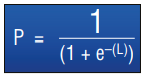

In [2]:
def logit(x):
    return np.log( x / (1 - x) )

Text(0, 0.5, 'Logit - L')

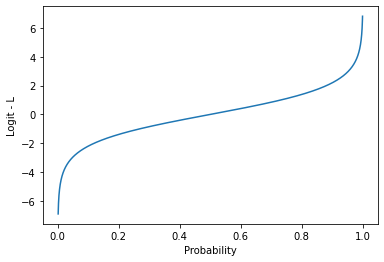

In [3]:
x = np.arange(0.001,0.999, 0.0001)
y = [logit(n) for n in x]
plt.plot(x,y)
plt.xlabel("Probability")
plt.ylabel("Logit - L")

Sigmoid Curve
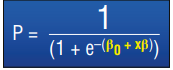

In [4]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

Text(0, 0.5, 'Probability')

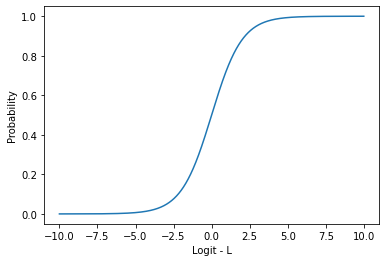

In [5]:
x = np.arange(-10, 10, 0.0001)
y = [sigmoid(n) for n in x]
plt.plot(x,y)
plt.xlabel("Logit - L")
plt.ylabel("Probability")

Using the Breast Cancer Wisconsin (Diagnostic) Data Set

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

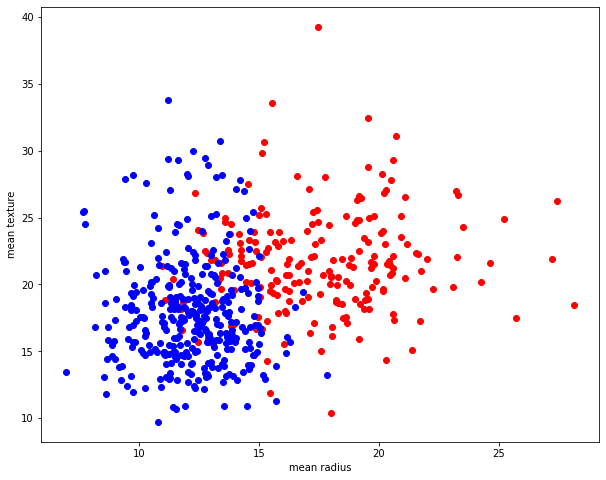

In [8]:
X = []
for target in range(2):
    X.append([[], []])
    for i in range(len(cancer.data)): # target is 0 or 1
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0]) # first feature - mean radius
            X[target][1].append(cancer.data[i][1]) # second feature — mean texture
colours = ("r", "b") # r: malignant, b: benign
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
for target in range(2):
    ax.scatter(X[target][0],X[target][1],c=colours[target])
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
plt.show()

In [9]:
from mpl_toolkits.mplot3d import Axes3D

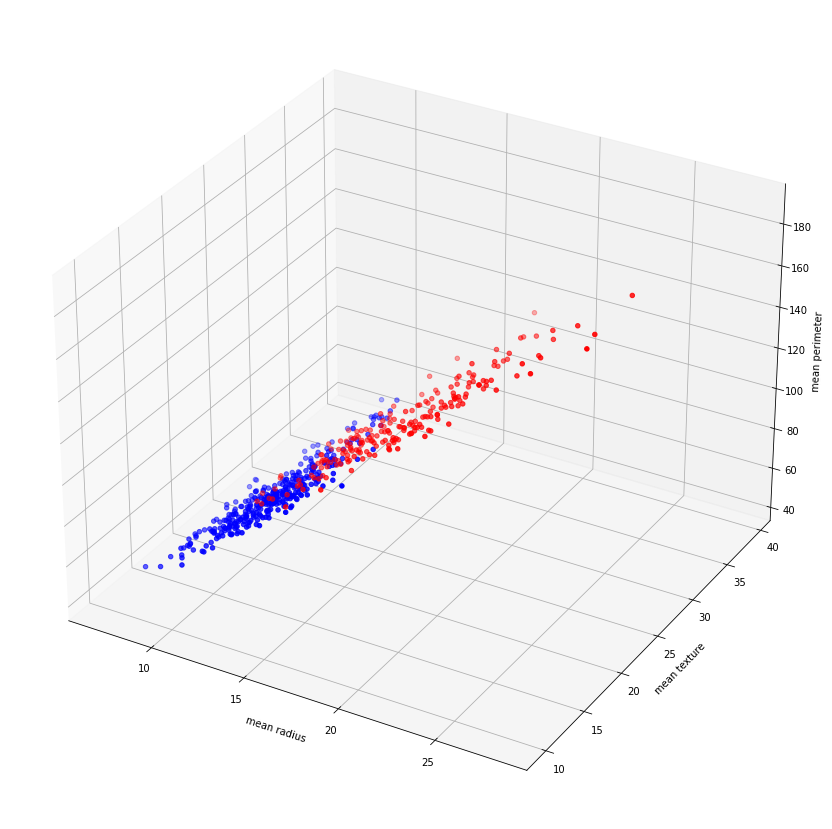

In [11]:
X = []
for target in range(2):
    X.append([[], [],[]])
    for i in range(len(cancer.data)): # target is 0 or 1
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0]) # first feature - mean radius
            X[target][1].append(cancer.data[i][1]) # second feature — mean texture
            X[target][2].append(cancer.data[i][2])
colours = ("r", "b") # r: malignant, b: benign
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
for target in range(2):
    ax.scatter(X[target][0],X[target][1],X[target][2],c=colours[target])
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.set_zlabel("mean perimeter")
plt.show()

Training Using One Feature

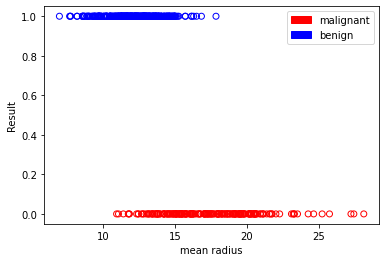

In [12]:
import matplotlib.patches as mpatches
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() # Load dataset
x = cancer.data[:,0] # mean radius
y = cancer.target # 0: malignant, 1: benign
colors = {0:'red', 1:'blue'} # 0: malignant, 1: benign
plt.scatter(x,y,
 facecolors='none',
 edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: 
colors[x]),
 cmap=colors)
plt.xlabel("mean radius")
plt.ylabel("Result")
red = mpatches.Patch(color='red', label='malignant')
blue = mpatches.Patch(color='blue', label='benign')
plt.legend(handles=[red, blue], loc=1)

Finding the Intercept and Coefficient

In [16]:
from sklearn import linear_model
import numpy as np
log_regress = linear_model.LogisticRegression()
#---train the model---
log_regress.fit(X = np.array(x).reshape(len(x),1),y = y)
#---print trained model intercept---
print(log_regress.intercept_) # [ 8.19393897]
#---print trained model coefficients---
print(log_regress.coef_) # [[-0.54291739]]

[15.120902]
[[-1.02475609]]


Plotting the Sigmoid Curve

Text(0, 0.5, 'Probability')

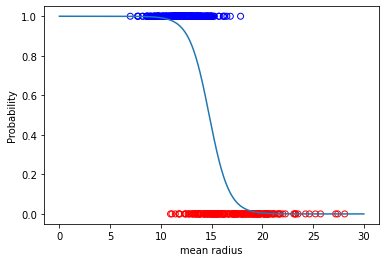

In [17]:
def sigmoid(x):
    return (1 / (1 +np.exp(-(log_regress.intercept_[0] +(log_regress.coef_[0][0] * x)))))
x1 = np.arange(0, 30, 0.01)
y1 = [sigmoid(n) for n in x1]
plt.scatter(x,y,facecolors='none',edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x:colors[x]),cmap=colors)
plt.plot(x1,y1)
plt.xlabel("mean radius")
plt.ylabel("Probability")

Training the Model Using All Features

In [21]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() # Load dataset

In [22]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(cancer.data, # features
                                                                  cancer.target, # labels
                                                                  test_size = 0.25, # split ratio
                                                                  random_state = 1, # set random seed
                                                                  stratify = cancer.target) # randomize based on labels

In [25]:
from sklearn import linear_model
x = train_set[:,0:30] # mean radius
y = train_labels # 0: malignant, 1: benign
log_regress = linear_model.LogisticRegression()
log_regress.fit(X = x,y = y)

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
print(log_regress.intercept_)
print(log_regress.coef_) 

[0.1040433]
[[ 0.59145907  0.52936053  0.51629048 -0.03146512 -0.01633054 -0.09197459
  -0.13035811 -0.05162931 -0.02998592 -0.00436528  0.02752021  0.14002374
   0.02781843 -0.11087284 -0.00144515 -0.02172859 -0.02975257 -0.00691836
  -0.00563276 -0.00207695  0.68480337 -0.5742498  -0.31457431 -0.00648102
  -0.03300924 -0.31116881 -0.39169321 -0.10557448 -0.08921668 -0.02908004]]


Testing the Model

In [27]:
import pandas as pd
#---get the predicted probablities and convert into a dataframe---
preds_prob = pd.DataFrame(log_regress.predict_proba(X=test_set))
#---assign column names to prediction---
preds_prob.columns = ["Malignant", "Benign"]
#---get the predicted class labels---
preds = log_regress.predict(X=test_set)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]
#---actual diagnosis---
original_result = pd.DataFrame(test_labels)
original_result.columns = ["Original Result"]
#---merge the three dataframes into one---
result = pd.concat([preds_prob, preds_class, original_result], axis=1)
print(result.head())

   Malignant        Benign  Prediction  Original Result
0   0.999832  1.680790e-04           0                0
1   0.999752  2.482858e-04           0                0
2   0.169365  8.306353e-01           1                1
3   1.000000  5.737933e-09           0                0
4   0.090998  9.090015e-01           1                0


Getting the Confusion Matrix

In [28]:
#---generate table of predictions vs actual---
print("---Confusion Matrix---")
print(pd.crosstab(preds, test_labels))

---Confusion Matrix---
col_0   0   1
row_0        
0      48   4
1       5  86


In [29]:
from sklearn import metrics
#---view the confusion matrix---
print(metrics.confusion_matrix(y_true = test_labels, # True labels
 y_pred = preds)) # Predicted labels

[[48  5]
 [ 4 86]]


In [30]:
#---get the accuracy of the prediction---
print("---Accuracy---")
print(log_regress.score(X = test_set ,
 y = test_labels))

---Accuracy---
0.9370629370629371


In [31]:
# View summary of common classification metrics
print("---Metrices---")
print(metrics.classification_report(
 y_true = test_labels,
 y_pred = preds))

---Metrices---
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [32]:
from sklearn.metrics import roc_curve, auc
#---find the predicted probabilities using the test set
probs = log_regress.predict_proba(test_set)
preds = probs[:,1]
#---find the FPR, TPR, and threshold---
fpr, tpr, threshold = roc_curve(test_labels, preds)

In [33]:
print(fpr)
print(tpr)
print(threshold)

[0.         0.         0.         0.01886792 0.01886792 0.03773585
 0.03773585 0.05660377 0.05660377 0.0754717  0.0754717  0.13207547
 0.13207547 0.1509434  0.1509434  0.22641509 0.22641509 1.        ]
[0.         0.01111111 0.66666667 0.66666667 0.87777778 0.87777778
 0.91111111 0.91111111 0.93333333 0.93333333 0.95555556 0.95555556
 0.97777778 0.97777778 0.98888889 0.98888889 1.         1.        ]
[1.99994259e+00 9.99942592e-01 9.81127587e-01 9.80887486e-01
 9.17736366e-01 9.09001542e-01 8.67292694e-01 8.32421275e-01
 8.30635338e-01 7.72913975e-01 7.08253478e-01 2.89853901e-01
 2.64449395e-01 2.34913930e-01 7.41857870e-02 3.23123449e-02
 1.10553534e-02 1.87414789e-20]


Plotting the ROC and Finding the Area Under the Curve (AUC)

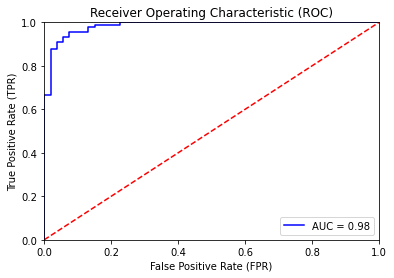

In [34]:
#---find the area under the curve---
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()